In [18]:
import pandas as pd

In [ ]:
# Method to import data from a csv file
# The data is stored in a pandas DataFrame
path_to_file = "/Users/qxzjy/vscworkspace/dse-ft-100/python_course/python_pandas_training/data"
data = pd.read_csv(path_to_file + "/covid-19.csv")
data = data.iloc[:, 1:]
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,933,264,Belgium,BE,BEL,11422068.0,Europe
1,2020-04-22,22,4,2020,973,170,Belgium,BE,BEL,11422068.0,Europe
2,2020-04-21,21,4,2020,1487,145,Belgium,BE,BEL,11422068.0,Europe
3,2020-04-20,20,4,2020,1313,230,Belgium,BE,BEL,11422068.0,Europe
4,2020-04-19,19,4,2020,1045,290,Belgium,BE,BEL,11422068.0,Europe


In [20]:
us_mask = data["geoId"] == "US"
us_data = data[us_mask]
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
575,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America
576,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America
577,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America
578,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America
579,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America


In [21]:
us_data = us_data.reset_index(drop=True)

In [22]:
us_data["cumulated_cases"] = 0
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,0
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,0
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,0
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,0
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,0


In [23]:
total_rows = len(us_data)

for i in range(total_rows-2, -1, -1):
    us_data.loc[i, "cumulated_cases"] = us_data.loc[i, "cases"] + us_data.loc[i+1, "cumulated_cases"]

us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086


In [24]:
us_data["growth_ratio"] = 0

for i in range(total_rows-2, -1, -1):
    us_data.loc[i, "growth_ratio"] = us_data.loc[i, "cases"] / us_data.loc[i+1, "cases"]

us_data.head()

/var/folders/yt/qrbwlc0x6fj2rs4chrxkrm_m0000gn/T/ipykernel_43408/294576908.py:4: RuntimeWarning: invalid value encountered in scalar divide
  us_data.loc[i, "growth_ratio"] = us_data.loc[i, "cases"] / us_data.loc[i+1, "cases"]
/var/folders/yt/qrbwlc0x6fj2rs4chrxkrm_m0000gn/T/ipykernel_43408/294576908.py:4: RuntimeWarning: invalid value encountered in scalar divide
  us_data.loc[i, "growth_ratio"] = us_data.loc[i, "cases"] / us_data.loc[i+1, "cases"]
/var/folders/yt/qrbwlc0x6fj2rs4chrxkrm_m0000gn/T/ipykernel_43408/294576908.py:4: RuntimeWarning: invalid value encountered in scalar divide
  us_data.loc[i, "growth_ratio"] = us_data.loc[i, "cases"] / us_data.loc[i+1, "cases"]
/var/folders/yt/qrbwlc0x6fj2rs4chrxkrm_m0000gn/T/ipykernel_43408/294576908.py:4: RuntimeWarning: invalid value encountered in scalar divide
  us_data.loc[i, "growth_ratio"] = us_data.loc[i, "cases"] / us_data.loc[i+1, "cases"]
/var/folders/yt/qrbwlc0x6fj2rs4chrxkrm_m0000gn/T/ipykernel_43408/294576908.py:4: RuntimeWarn

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,growth_ratio
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,0.471667
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,1.328666
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,1.140807
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,0.747251
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,1.067752


<Axes: xlabel='dateRep'>

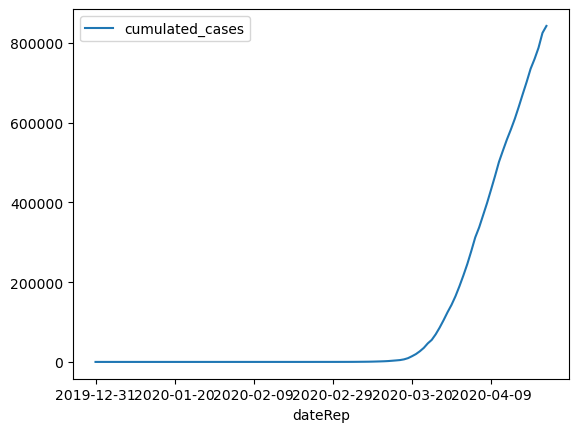

In [25]:
us_data = us_data.sort_values("dateRep")
us_data.plot.line(x="dateRep", y="cumulated_cases")

<Axes: xlabel='dateRep'>

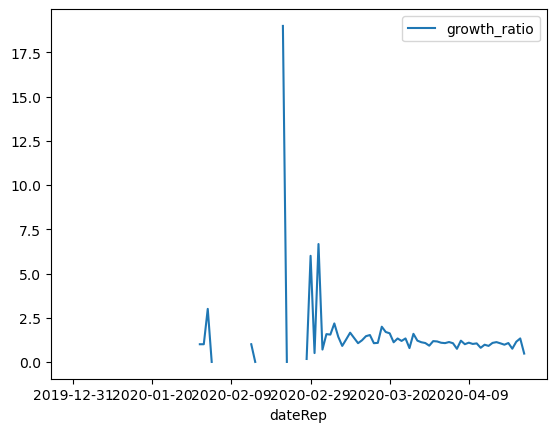

In [26]:
us_data.plot.line(x="dateRep", y="growth_ratio")

<Axes: xlabel='dateRep'>

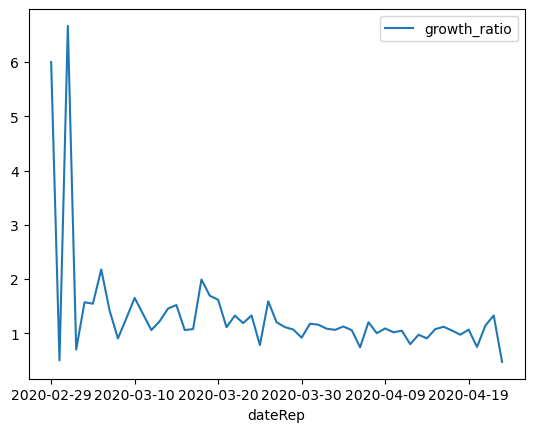

In [27]:
dateRep_mask = us_data["dateRep"] >= "2020-02-29"
us_data[dateRep_mask].plot.line(x="dateRep", y="growth_ratio")

<Axes: xlabel='dateRep'>

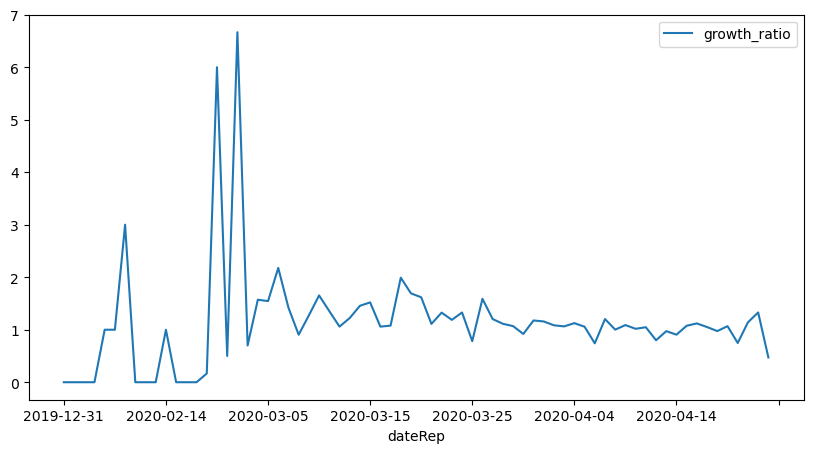

In [17]:
# Better to use the first method, cause it's take count of all dateRep.
# In this case, if the growth_ratio is greater than 7.5 during a long period of time, we'll not see it, it's misleading
growth_ratio_mask = us_data["growth_ratio"] <= 7.5
us_data[growth_ratio_mask].plot.line(x="dateRep", y="growth_ratio", figsize=(10, 5))


<Axes: xlabel='dateRep'>

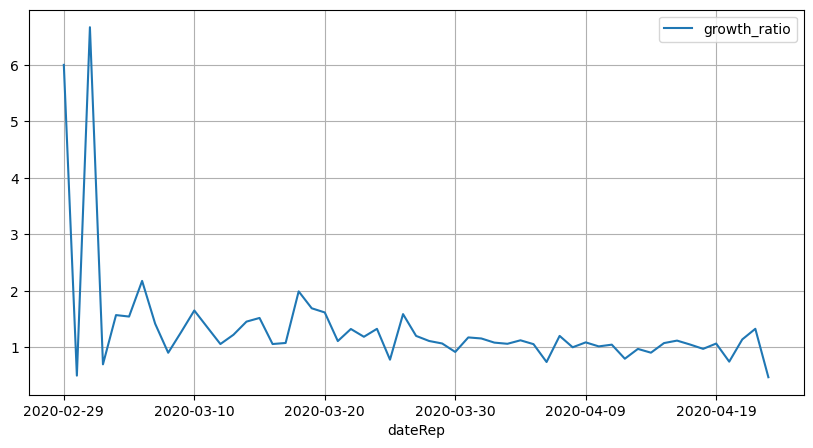

In [29]:
dateRep_mask = us_data["dateRep"] >= "2020-02-29"
us_data[dateRep_mask].plot.line(x="dateRep", y="growth_ratio", figsize=(10, 5), grid=True)